Q-7. Imagine you have a dataset where you need to predict the Genres of Music
using
an Unsupervised algorithm and you need to find the accuracy of the model, built-in
docker, and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("data_2genre.csv")

In [18]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [19]:
df.shape

(200, 30)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            200 non-null    object 
 1   tempo               200 non-null    float64
 2   beats               200 non-null    int64  
 3   chroma_stft         200 non-null    float64
 4   rmse                200 non-null    float64
 5   spectral_centroid   200 non-null    float64
 6   spectral_bandwidth  200 non-null    float64
 7   rolloff             200 non-null    float64
 8   zero_crossing_rate  200 non-null    float64
 9   mfcc1               200 non-null    float64
 10  mfcc2               200 non-null    float64
 11  mfcc3               200 non-null    float64
 12  mfcc4               200 non-null    float64
 13  mfcc5               200 non-null    float64
 14  mfcc6               200 non-null    float64
 15  mfcc7               200 non-null    float64
 16  mfcc8   

In [21]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,119.896118,55.605000,0.330516,0.121342,2213.827679,2264.973183,4568.788040,0.105623,-193.933982,104.612778,...,-0.181143,-1.285880,-0.717986,-0.499806,0.035002,-0.100388,0.549379,-0.108176,-0.379320,1.500000
std,30.112891,15.691722,0.084184,0.092350,985.867013,798.344395,2323.849308,0.042441,149.931065,42.927715,...,4.754908,4.217877,4.261599,3.761752,4.102517,3.894046,3.680286,3.271097,3.431767,0.501255
min,58.726918,18.000000,0.181161,0.005276,690.075902,897.994319,749.062137,0.031538,-552.064063,32.351664,...,-15.805227,-17.465421,-11.930792,-10.189898,-13.840137,-10.179055,-11.975698,-9.139271,-8.060386,1.000000
25%,99.384014,46.000000,0.258248,0.031874,1347.129607,1521.334572,2475.832946,0.072016,-315.171960,64.449632,...,-3.148961,-4.074475,-3.471445,-2.810213,-2.440365,-2.362097,-1.965310,-2.155562,-2.827388,1.000000
50%,112.347147,53.000000,0.319846,0.115266,1978.153345,2282.710723,4096.850227,0.098227,-160.977130,103.129688,...,-0.138695,-1.225230,-0.644514,-0.476842,-0.374491,-0.347750,0.584017,-0.132256,-0.385403,1.500000
75%,135.999178,63.250000,0.404738,0.203261,3142.027144,3051.903827,6879.118820,0.136022,-52.513953,142.466745,...,2.623939,1.877754,1.808364,1.506955,2.272164,2.148825,2.479095,2.041620,1.701538,2.000000
max,234.907670,117.000000,0.522647,0.398012,4225.662023,3509.578677,8676.405868,0.230045,24.490849,190.791967,...,18.226380,8.493653,18.161663,12.357588,11.609025,11.489994,15.379257,14.686910,11.511355,2.000000


In [22]:
df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df.drop(["filename"],axis=1,inplace=True)

In [36]:
df

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,61.522054,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,85.941142,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,61.242109,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,62.799474,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,64.495215,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,143.554688,69,0.269065,0.038438,1218.290508,1353.616224,2295.177788,0.069813,-300.937697,161.111154,...,-1.808325,-4.104602,-2.045668,-1.596437,0.646648,1.454414,-0.221094,-1.292084,-7.100527,2
196,117.453835,57,0.279421,0.020732,1284.921775,1659.622614,2476.568358,0.063750,-360.821769,138.999302,...,4.684600,3.343187,-2.251255,-1.852868,2.215029,1.784788,-1.519674,-3.253521,3.998950,2
197,151.999081,76,0.281670,0.048189,1322.026416,1590.233329,2473.626709,0.076126,-274.426858,148.374498,...,-4.592368,-1.540610,-3.028737,-4.697145,-7.715005,-7.212517,-5.410751,-5.246985,-5.270150,2
198,135.999178,67,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,127.769046,...,4.709107,0.377206,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,2


In [37]:
X = df

In [38]:
from sklearn.cluster import KMeans

# Assuming 'X' contains the preprocessed dataset
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


c:\users\vision\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [39]:
labels = kmeans.labels_


In [40]:
from sklearn.metrics import silhouette_score

# Assuming 'X' contains the preprocessed dataset
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7300345985813224


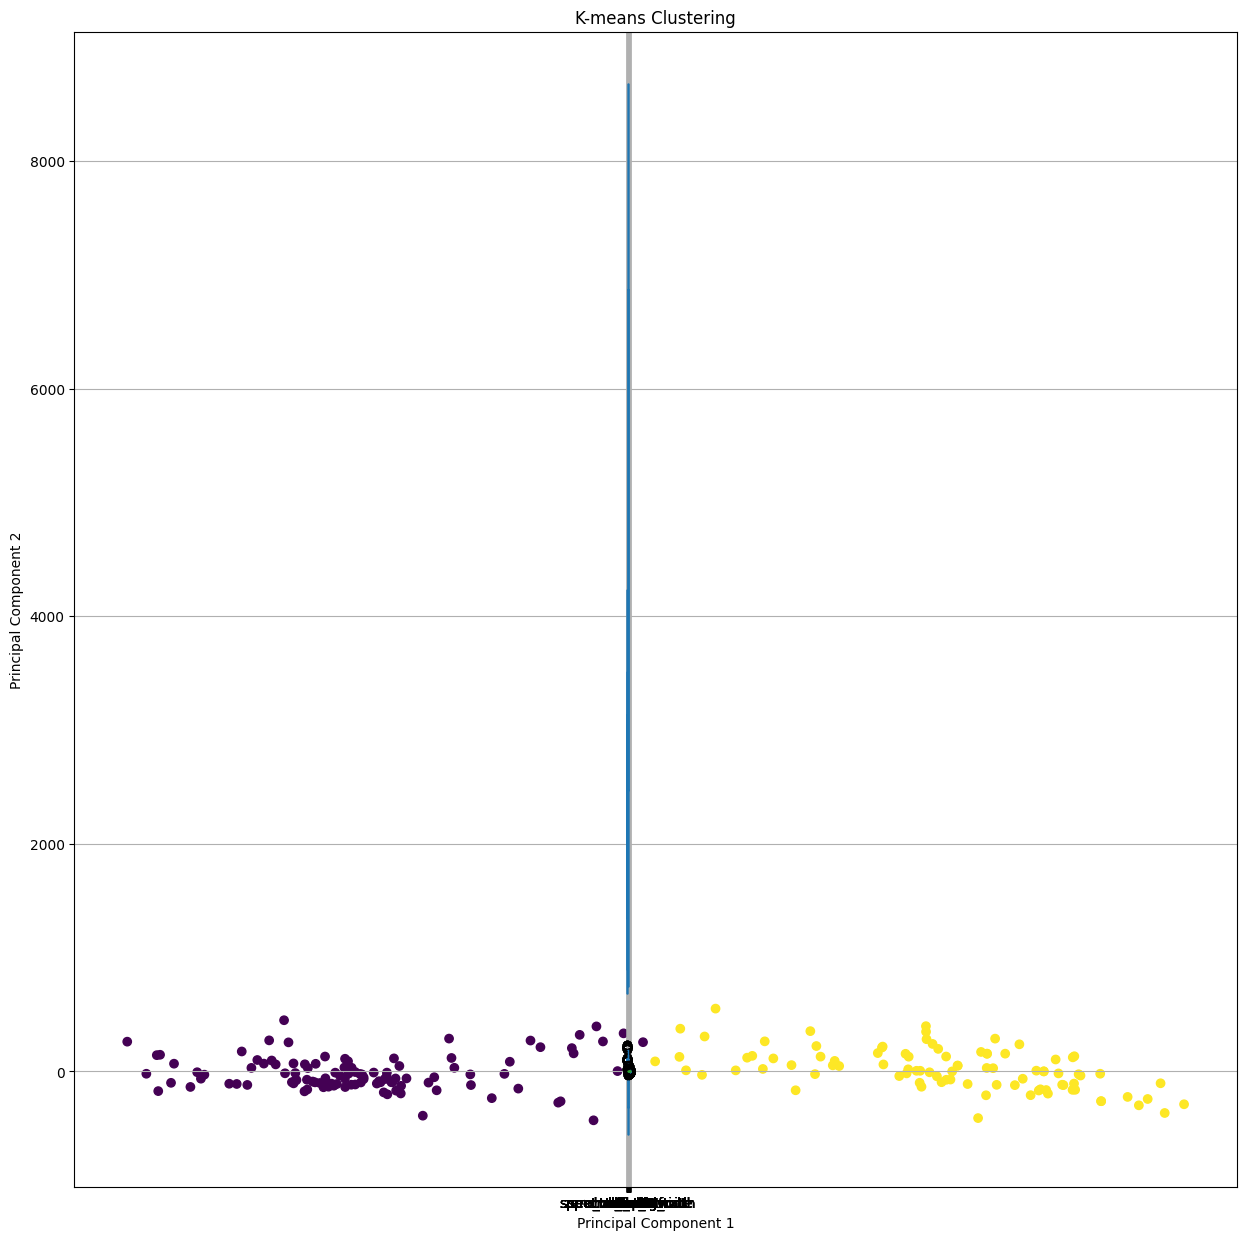

In [41]:
# Visualize the clusters (example using PCA)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' contains the preprocessed dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering")
plt.show()
